In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prediction.csv')
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [3]:
df.shape

(28143, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [5]:
df.describe()

,model_year,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28126.000000,28143.000000,2.812600e+04,28143.000000
mean,2013.456774,21.769242,0.533525,5.736535e+04,0.137299
std,6.847536,13.472177,0.498884,6.146327e+04,0.344169
min,1974.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,17.000000,0.000000,3.000000e+04,0.000000
50%,2015.000000,20.000000,1.000000,4.120000e+04,0.000000
75%,2019.000000,24.000000,1.000000,6.400000e+04,0.000000
max,2024.000000,234.000000,1.000000,2.500000e+06,1.000000


In [6]:
df.columns

Index(['model_year', 'brand', 'model', 'type', 'miles_per_gallon',
       'premium_version', 'msrp', 'collection_car'],
      dtype='object')

In [7]:
df[df.duplicated()]

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [8]:
df.nunique()

model_year            36
brand                 57
model               1898
type                   9
miles_per_gallon     121
premium_version        2
msrp                2950
collection_car         2
dtype: int64

In [9]:
cat = []
num = []
for i in df.columns:
    if df[i].nunique()<100:
        print(i, df[i].nunique(), df[i].unique())
        cat.append(i)
    else:
        num.append(i)

model_year 36 [2016 2014 2002 2012 2008 2013 2021 2017 2019 2020 2023 2018 2004 2022
 2015 2009 2011 2010 2001 2007 2005 2000 2003 2006 1999 1997 2024 1993
 1994 1998 1995 1996 1992 1974 1982 1988]
brand 57 ['Toyota' 'RAM' 'Ford' 'BMW' 'Mercedes-Benz' 'Lexus' 'Chevrolet' 'Audi'
 'Porsche' 'Genesis' 'Hummer' 'Mazda' 'Land' 'Honda' 'Jeep' 'Jaguar'
 'Lincoln' 'Nissan' 'Saturn' 'Cadillac' 'Kia' 'Maserati' 'Volkswagen'
 'Dodge' 'Subaru' 'Chrysler' 'Hyundai' 'Mitsubishi' 'INFINITI' 'Tesla'
 'Lamborghini' 'GMC' 'MINI' 'Acura' 'Buick' 'Rivian' 'Pontiac' 'Alfa'
 'Mercury' 'Volvo' 'Rolls-Royce' 'McLaren' 'Bentley' 'Aston' 'FIAT'
 'Scion' 'Ferrari' 'Lucid' 'Saab' 'Maybach' 'Karma' 'Suzuki' 'Lotus'
 'Bugatti' 'Plymouth' 'smart' 'Polestar']
type 9 ['SUV' 'Van' 'Coupe' 'Sedan' 'Convertible' 'Pickup' 'Minivan' 'Hatchback'
 'Wagon']
premium_version 2 [1 0]
collection_car 2 [0 1]


In [10]:
num

['model', 'miles_per_gallon', 'msrp']

In [11]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [12]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [13]:
(df['msrp'].mean())
df['msrp'] = df['msrp'].fillna(df['msrp'].mean())

In [14]:
df['miles_per_gallon'].mean()

21.769241982507285

In [15]:
df['miles_per_gallon'] = df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean())

In [16]:
df.isnull().sum()

model_year          0
brand               0
model               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
collection_car      0
dtype: int64

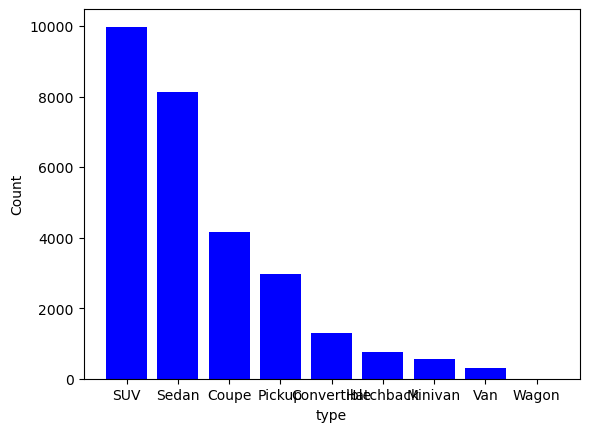

In [17]:
# data is balanced
# x = category 
# height = value
vc = df['type'].value_counts()
plt.bar(vc.index, height=vc, color='b')
plt.xlabel('type')
plt.ylabel('Count')
plt.show()

In [18]:
vc.index  #category wise index

Index(['SUV', 'Sedan', 'Coupe', 'Pickup', 'Convertible', 'Hatchback',
       'Minivan', 'Van', 'Wagon'],
      dtype='object', name='type')

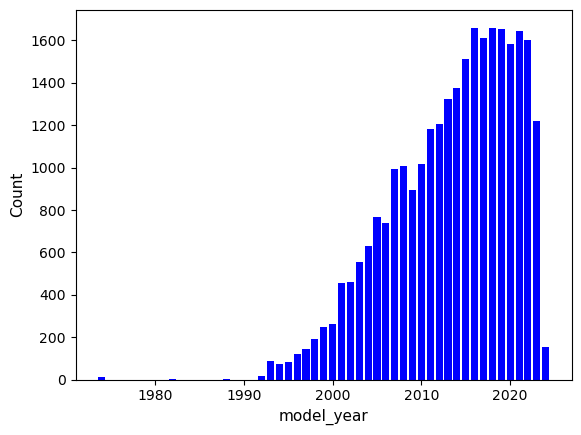

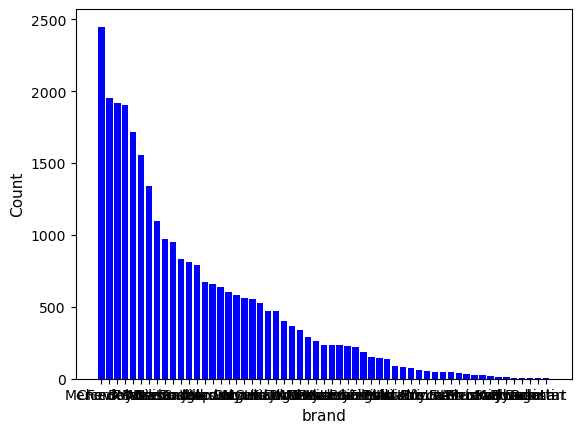

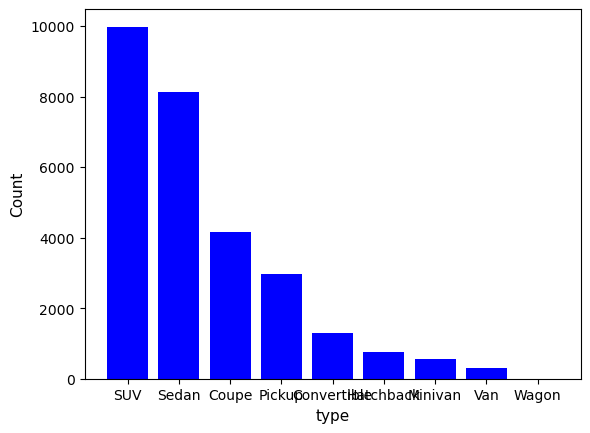

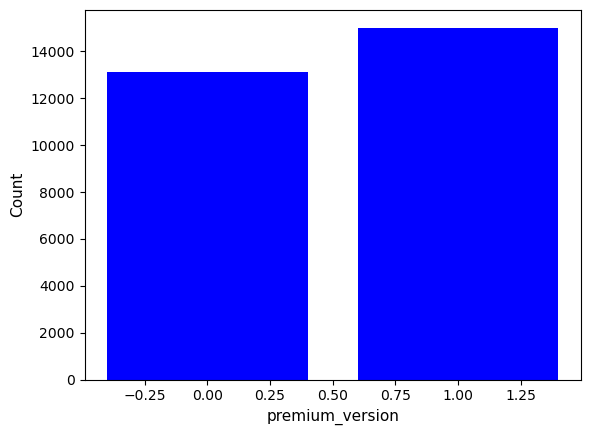

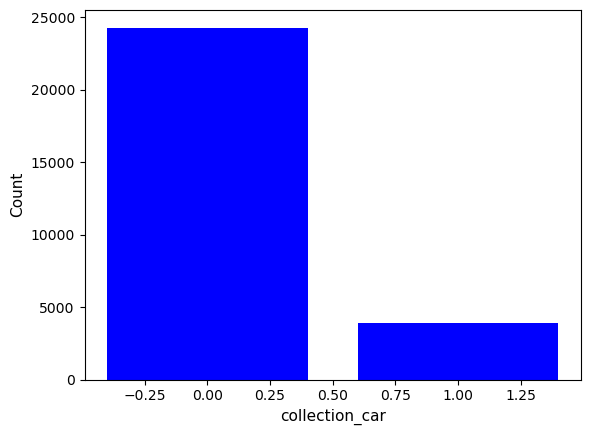

In [19]:
for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height=vc, color='b')
    plt.xlabel(i, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.show()

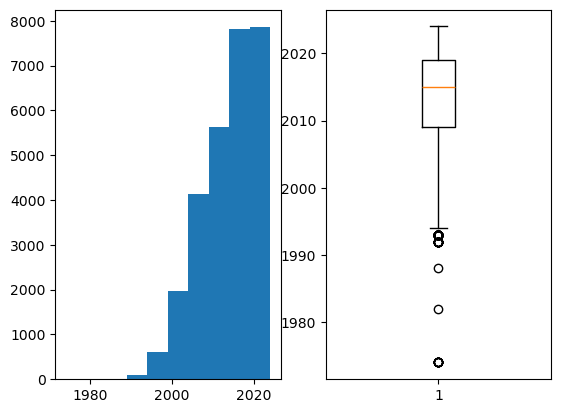

In [20]:
#fig = chart, single frame
fig, ax=plt.subplots(1,2) #1 row, 2 column
ax[0].hist(df['model_year'])
ax[1].boxplot(df['model_year'])
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

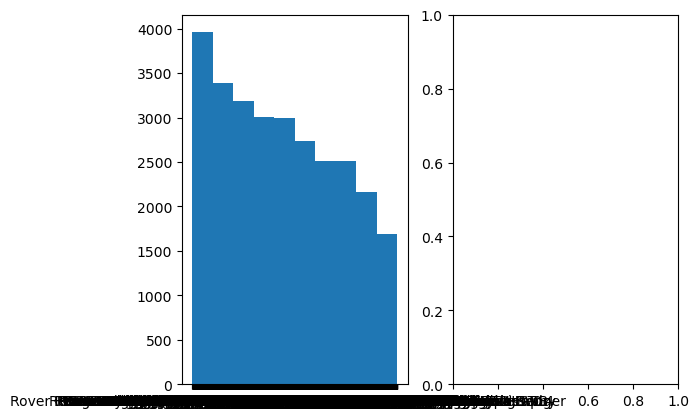

In [21]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

In [27]:
df.drop(['model'], axis=1, inplace = True)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,SUV,13.0,1,84900.0,0
1,2014,RAM,Van,15.0,0,35000.0,0
2,2002,Ford,Coupe,16.0,0,26250.0,0
3,2012,BMW,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,Coupe,18.0,0,25000.0,0
28140,2018,Ford,SUV,94.0,1,199000.0,1
28141,2022,Land,SUV,20.0,1,63700.0,0


In [29]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [31]:
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder -- function

In [32]:
df['type']

0                SUV
1                Van
2              Coupe
3              Sedan
4        Convertible
            ...     
28138          Coupe
28139          Coupe
28140            SUV
28141            SUV
28142          Sedan
Name: type, Length: 28143, dtype: object

In [35]:
ohe = OneHotEncoder(sparse_output = False) #sparse_output long output
type_car = ohe.fit_transform(df[['type']]) #it accept datafame only [['Location']]
type_car

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [37]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [39]:
type(type_car)

numpy.ndarray

In [41]:
# convert ndarray into dataframe
type_car_df = pd.DataFrame(type_car, columns= ohe.categories_)
type_car_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
df = pd.concat([df, type_car_df], axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
df['brand']

0               Toyota
1                  RAM
2                 Ford
3                  BMW
4        Mercedes-Benz
             ...      
28138          Bentley
28139            Mazda
28140             Ford
28141             Land
28142             Audi
Name: brand, Length: 28143, dtype: object

In [47]:
ohe1 = OneHotEncoder(sparse_output = False) #sparse_output long output
car_brand = ohe1.fit_transform(df[['brand']]) #it accept datafame only [['Location']]
type_car

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [49]:
ohe1.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [51]:
type(car_brand)

numpy.ndarray

In [53]:
# convert ndarray into dataframe
car_brand_df = pd.DataFrame(car_brand, columns= ohe1.categories_)
car_brand_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df = pd.concat([df, car_brand_df], axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [59]:
x_df= df.drop(['brand', 'type','msrp'], axis = 1)  #Independent data
y= df['msrp'] #dependent data
x_df

,model_year,miles_per_gallon,premium_version,collection_car,"(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,16.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,18.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x = x_df.values    ## convert dataframe into array
y = y.values

In [63]:
x

array([[2.016e+03, 1.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 1.500e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.002e+03, 1.600e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.018e+03, 9.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 2.000e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.200e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [65]:
y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1) #80-20 select data randomly

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22514, 70)
(5629, 70)
(22514,)
(5629,)


In [71]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)   #relation btw x_rain and y_train

LinearRegression()

In [73]:
y_train_pred = lr_model.predict(x_train)  

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
mse_t = mean_squared_error(y_train_pred, y_train)
rmse_t = mean_squared_error(y_train_pred, y_train)**0.5
mae_t = mean_absolute_error(y_train_pred, y_train)
r2_lin_train = r2_score(y_train, y_train_pred)

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)

1273487856.167996
35685.96161192796
16645.479975501465
0.6866831394309315


In [79]:
y_test_pred = lr_model.predict(x_test)
mse_test = mean_squared_error(y_test_pred, y_test)
rmse_test = mean_squared_error(y_test_pred, y_test)**0.5
mae_test = mean_absolute_error(y_test_pred, y_test)
r2_lin_test = r2_score(y_test, y_test_pred)

In [81]:
print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

757250524.7822847
27518.18534682628
16265.745706114623
0.7107631342390929


# LASSO

In [114]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Lasso(alpha=1.0)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

1273541753.1568956
35686.71676067855
16648.80077763784
0.6866698791275259


In [141]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Lasso(alpha=1.0)  # alpha = lambda
l1.fit(x_test, y_test)
y_pred_test_l1 = l1.predict(x_test)

mse_l1_test = mean_squared_error(y_pred_test_l1, y_test)
rmse_l1_test= mean_squared_error(y_pred_test_l1, y_test)**0.5
mae_l1_test= mean_absolute_error(y_pred_test_l1, y_test)
r2_l1_test= r2_score(y_test, y_pred_test_l1)

print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

724607556.1803017
26918.535550439992
15866.522606732407
0.7232313328320008


C:\Users\hasti.LAPTOP-SLFI7KTT\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+10, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


# RIDGE 

In [116]:

from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Ridge(alpha=1.0)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)  # actual - predicted

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

1308386767.790274
36171.62932175262
16761.113809782455
0.6780969425749428


In [143]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Ridge(alpha=1.0)  # alpha = lambda
l1.fit(x_test, y_test)
y_pred_test_l1 = l1.predict(x_test)

mse_l1_test = mean_squared_error(y_pred_test_l1, y_test)
rmse_l1_test= mean_squared_error(y_pred_test_l1, y_test)**0.5
mae_l1_test= mean_absolute_error(y_pred_test_l1, y_test)
r2_l1_test= r2_score(y_test, y_pred_test_l1)

print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

727025090.5856884
26963.402800568187
15940.032333558553
0.7223079395144667


# ElasticNet Regressar

In [126]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= ElasticNet(alpha=1.0, l1_ratio=0.6)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

3328583185.475081
57693.87476565498
25624.415511195377
0.18106699740805043


In [145]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= ElasticNet(alpha=1.0, l1_ratio=0.6)  # alpha = lambda
l1.fit(x_test, y_test)
y_pred_test_l1 = l1.predict(x_test)

mse_l1_test = mean_squared_error(y_pred_test_l1, y_test)
rmse_l1_test= mean_squared_error(y_pred_test_l1, y_test)**0.5
mae_l1_test= mean_absolute_error(y_pred_test_l1, y_test)
r2_l1_test= r2_score(y_test, y_pred_test_l1)

print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

1945254298.3077054
44105.037108109376
24881.88596740557
0.2569972051030054


# K-Nearest Neighbors regressar

In [129]:
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)
y_train_knn = knn_r.predict(x_train)

mse_knn_train = mean_squared_error(y_train_knn, y_train)
rmse_knn_train= mean_squared_error(y_train_knn, y_train)**0.5
mae_knn_train= mean_absolute_error(y_train_knn, y_train)
r2_knn_train= r2_score(y_train, y_train_knn)

print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

944516823.8315258
30732.99243210016
11342.437712717676
0.7676200486999204


In [147]:
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_test, y_test)
y_test_knn = knn_r.predict(x_test)

mse_knn_test = mean_squared_error(y_test_knn, y_test)
rmse_knn_test = mean_squared_error(y_test_knn, y_test)**0.5
mae_knn_test = mean_absolute_error(y_test_knn, y_test)
r2_knn_test= r2_score(y_test, y_test_knn)

print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)

651125425.9767073
25517.159441769913
13240.374132781946
0.7512983203532483


# Support Vector Regression (SVR)

In [132]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_svr = svr.predict(x_train)

mse_svr_train = mean_squared_error(y_train_svr, y_train)
rmse_svr_train= mean_squared_error(y_train_svr, y_train)**0.5
mae_svr_train= mean_absolute_error(y_train_svr, y_train)
r2_svr_train= r2_score(y_train, y_train_svr)

print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

4321070614.600733
65734.85083728975
28161.70293319332
-0.06311518614540912


In [152]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_test, y_test)
y_test_svr = svr.predict(x_test)

mse_svr_test = mean_squared_error(y_test_svr, y_test)
rmse_svr_test= mean_squared_error(y_test_svr, y_test)**0.5
mae_svr_test= mean_absolute_error(y_test_svr, y_test)
r2_svr_test= r2_score(y_test, y_test_svr)

print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

2866793081.6049023
53542.44187189171
27513.562645890102
-0.09499065180159572


# Decision treee regression

In [134]:
# Decision treee regression
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3, random_state = 0)
dtree.fit(x_train, y_train)
y_train_dtree = dtree.predict(x_train)

mse_dtree_train = mean_squared_error(y_train_dtree, y_train)
rmse_dtree_train= mean_squared_error(y_train_dtree, y_train)**0.5
mae_dtree_train= mean_absolute_error(y_train_dtree, y_train)
r2_dtree_train= r2_score(y_train, y_train_dtree)

print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

2031080432.6466498
45067.50972315477
23236.230237769505
0.5002922551338684


In [135]:
y_test_dtree = dtree.predict(x_test)

mse_dtree_test = mean_squared_error(y_test_dtree, y_test)
rmse_dtree_test= mean_squared_error(y_test_dtree, y_test)**0.5
mae_dtree_test= mean_absolute_error(y_test_dtree, y_test)
r2_dtree_test= r2_score(y_test, y_test_dtree)

print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

1574832106.590355
39684.15435145815
22931.156870088606
0.39848242067471573
